# Data Science Job Salaries Dataset

Data science jobs are some of the fastest-growing, most in-demand in technology. 
Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. 
The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent 
by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people 
with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be
required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. 
Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

### Feature Description
- work_year - The year the salary was paid
- experience_level - The experience level in the job during the year with the following possible values: 
    - EN Entry-level
    - Junior MI Mid-level
    - Intermediate SE Senior-level
    - Expert EX Executive-level
    - Director
- employment_type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title - The role worked in during the year
- salary - The total gross salary amount paid.
- salary_currency - The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
- employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code
- remote_ratio - The overall amount of work done remotely, possible values are as follows:
    - 0 No remote work (less than 20%)
    - 50 Partially remote 
    - 100 Fully remote (more than 80%)
- company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code
- company_size - The average number of people that worked for the company during the year:
    - S less than 50 employees (small) 
    - M 50 to 250 employees (medium) 
    - L more than 250 employees (large)

### Goal of the notebook:
1. Explore every feature in the dataset
2. Work Year Analysis(with Salary, Remote Ratio)
3. Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)
4. Company Location Analysis (with Experience Level)
5. Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)

#### Importing the necessary libraries

In [1]:
# Load Libraries for data manipulation and reading
import numpy as np
import pandas as pd

# Load Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To display the plots in the notebook
%matplotlib inline

#### Load the Dataset

In [2]:
df=pd.read_csv('ds_salaries.csv')

#### View the first 5 and last 5 rows in the dataset

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


#### Understand the shape of the dataset

In [5]:
# use df.shape
print('There are',df.shape[0],'rows and',df.shape[1],'columns in the dataset')

There are 607 rows and 12 columns in the dataset


In [6]:
# To view the columns in the dataset
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

* The column ***Unnamed: 0*** is irrelevant and will be deleted from the data using the drop() function

In [7]:
#use drop()
df=df.drop('Unnamed: 0',axis=1)

In [8]:
# To check the data if the ***Unnamed: 0*** column has been deleted
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
# Check the shape of the data
print('There are', df.shape[0],'rows and',df.shape[1],'columns')

There are 607 rows and 11 columns


#### Check the data types of the columns for the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


* There are 4 numerical columns in the dataset and 7 object type columns.

In [11]:
# check the summary statistics of the numerical columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.0,NaN,NaN,NaN,324000.062603,1544357.486636,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.0,NaN,NaN,NaN,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* `work_year:` The work year ranges from 2020 to 2022.
* `experience_level:` There are 4 unique experience levels. Intermediate SE Senior level tops the chart with a frequency of 280.
* `employment_type:` There are 4 unique employment types. Full-time(FT) constitutes the most with 588.
* `job_title:` There are 50 unique job titles. Data Scientist is the most common job title with 143
* `salary:` The average gross salary of a data professional is 324000. The salary of a data professional ranges from 4000 to 30400000. There is a huge difference between the 75% percentile(165000) and the maximum value(30400000). This indicates that there are outliers in this column
* `salary_currency:` There are 17 difference currencies with USD as the most received salary currency in the dataset.
* `salary_in_usd:` The average salary in usd is 112297. The salary in dollars ranges from 2859 to 600000. There is not much difference between the average and the median salary in dollars but there is a huge difference between the 75% percentile(150000) and the maximum usd salary(600000) which indicates the presence of outliers in this column.
* `employee_residence:` United States(US) has the highest count of data professionals.
* `remote_ratio:` Half of the dataset are working fully remote.
* `company_location:` Companies located in the United States(US) are more than those in other countries.
* `company_size:` There are 3 unique company sizes. There are more medium-sized companies in the dataset.

In [12]:
# Check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

* There are no missing values in the dataset.

In [14]:
# To get the unique values in the experience level column
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [13]:
#Rename the unique values
df.experience_level.replace({'MI':'Junior Mid-level','SE':'Intermediate Senior-level','EN':'Entry-level','EX': 'Expert Executive-level'},inplace=True)

In [14]:
# To get the unique values in the company size column
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [15]:
# Replace the unique values
df.company_size.replace({'L':'Large','S':'Small','M':'Medium'},inplace=True)
df.company_size.unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [16]:
# To get the unique values
df.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

In [17]:
# Replace the unique values in the remote ratio column
df.remote_ratio.replace({0:'No remote work',50:'Partially remote',100:'Fully remote'},inplace=True)
df.remote_ratio.unique()

array(['No remote work', 'Partially remote', 'Fully remote'], dtype=object)

### Univariate Analysis

#### Salary in USD

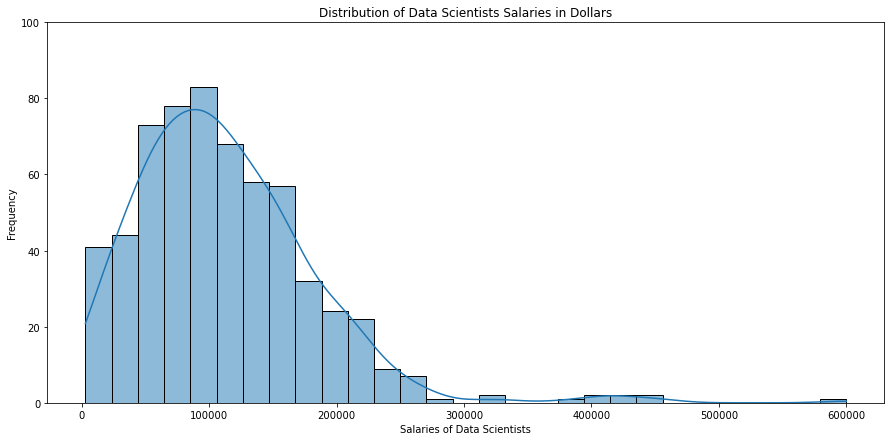

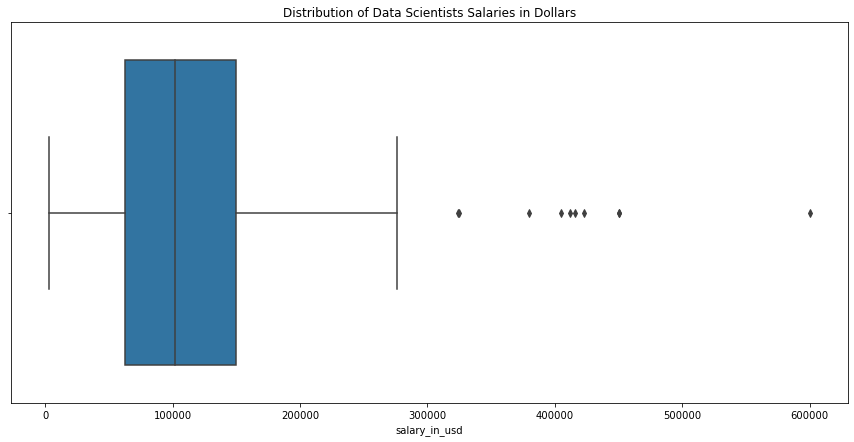

In [18]:
plt.figure(figsize=(15,7))
plt.title('Distribution of Data Scientists Salaries in Dollars')
plt.ylim(0,100)
plt.xlabel('Salaries of Data Scientists')
plt.ylabel('Frequency')
sns.histplot(data=df,x='salary_in_usd',kde=True)
plt.show()
          
          
          
plt.figure(figsize=(15,7))
plt.title('Distribution of Data Scientists Salaries in Dollars') 
plt.xlabel('Salaries of Data Scientists')
sns.boxplot(data=df,x='salary_in_usd')
plt.show()

* The distribution is skewed towards the right as a large number of occurences appear on the left side of the plot.
* Majority of data scientists earn between 60,000usd and 160,000usd.
* We can see that as the salaries increase from 200,000 usd the number of data scientists decrease.
* There are outliers present in this column.
* The median salary in dollars is around 100,000 usd. 75% of data scientists earn less than or equal to 150,000 usd.

#### Work Year

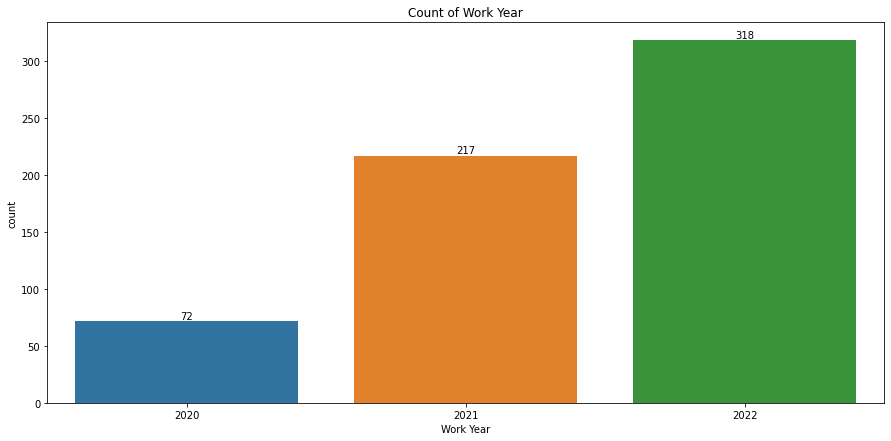

In [19]:
plt.figure(figsize=(15,7))
plt.title('Count of Work Year')
ax = sns.countplot(data=df,x='work_year')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Work Year')
plt.show()

* In 2020, the number of salaries paid were few. This could be as a result of the Covid Pandemic.
* In 2021, the salaries increased, which means that the companies were gradually recovering from the pandemic and in 2022, more salaries were paid,compared to 2020.

### Remote Ratio

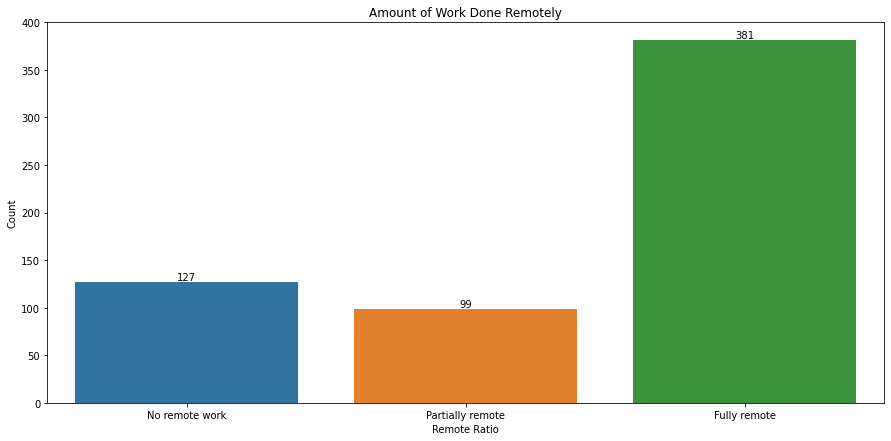

In [20]:
plt.figure(figsize=(15,7))
plt.title('Amount of Work Done Remotely')
ax=sns.countplot(data=df,x='remote_ratio')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.show()

* Majority of data scientists work fully remote.

#### Experience Level

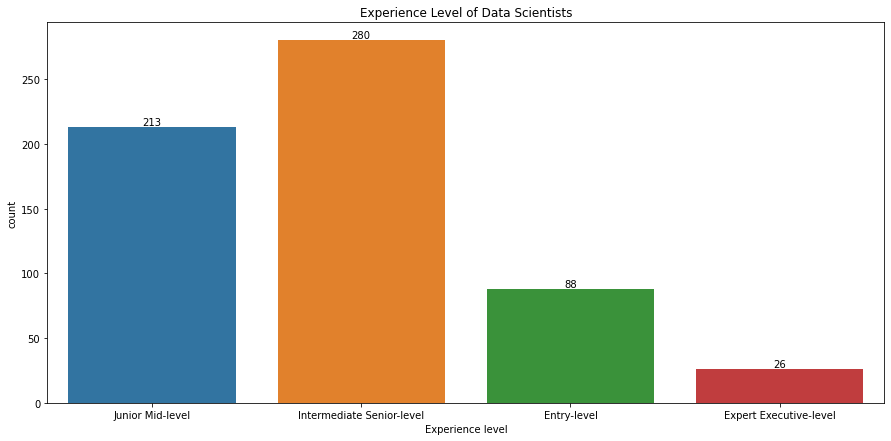

In [21]:
plt.figure(figsize=(15,7))
plt.title('Experience Level of Data Scientists')
ax=sns.countplot(data=df,x='experience_level')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Experience level')
plt.show()

* There are more data scientists in Intermediate Senior-level (SE).
* There are few data scientists in Expert Executive-level.

#### Job Titles

In [22]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

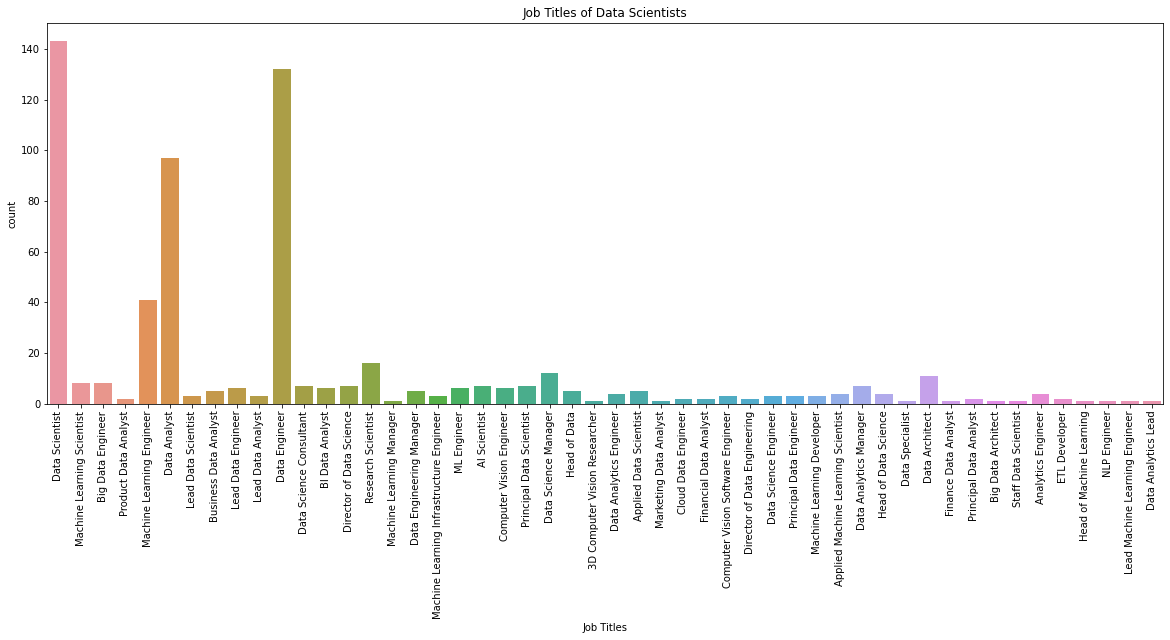

In [23]:
plt.figure(figsize=(20,7))
plt.title('Job Titles of Data Scientists')
sns.countplot(data=df,x='job_title')
plt.xlabel('Job Titles')
plt.xticks(rotation=90)
plt.show()

* The top 4 job titles are Data Scientist,Data Engineer, Data Analyst and Machine Learning Engineer

#### Employment Type

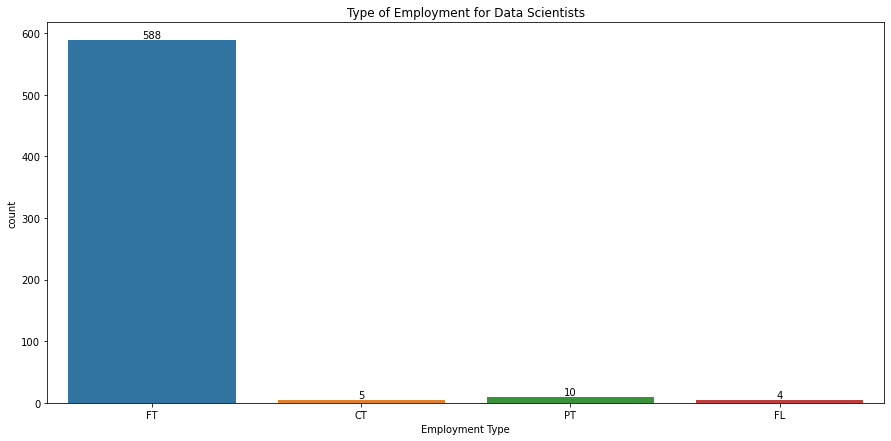

In [24]:
plt.figure(figsize=(15,7))
plt.title('Type of Employment for Data Scientists')
ax=sns.countplot(data=df,x='employment_type')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Employment Type')
plt.show()

* There are more data professionals who work full time.

#### Employee Residence

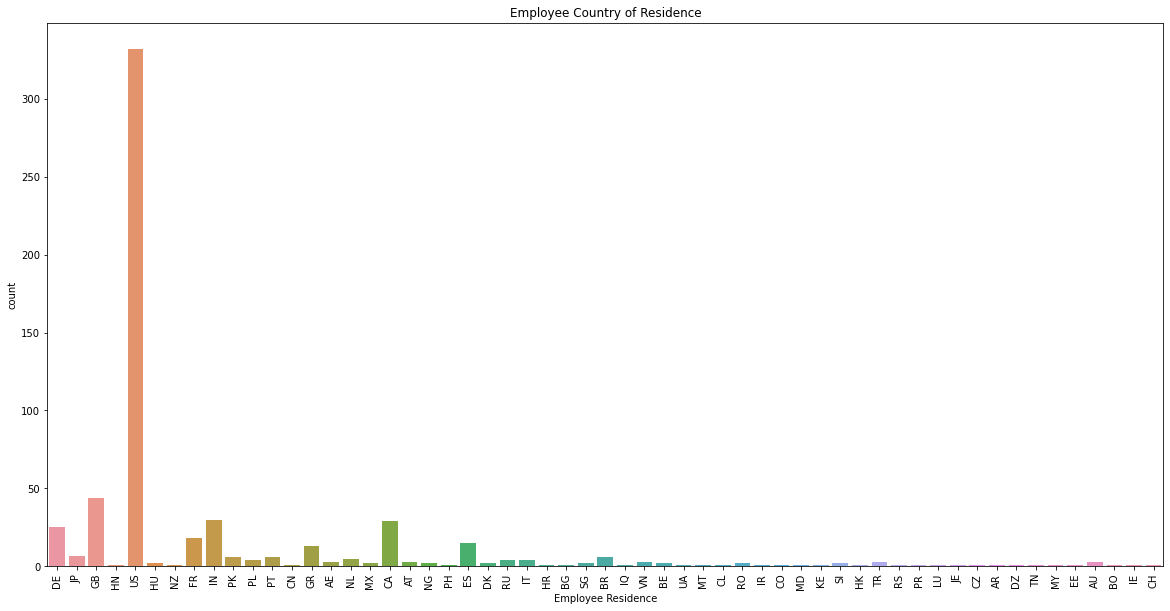

In [25]:
plt.figure(figsize=(20,10))
plt.title('Employee Country of Residence')
sns.countplot(data=df,x='employee_residence')
plt.xlabel('Employee Residence')
plt.xticks(rotation=90)
plt.show()

* United States is the most preferred country of residence for most data scientists

#### Company Location

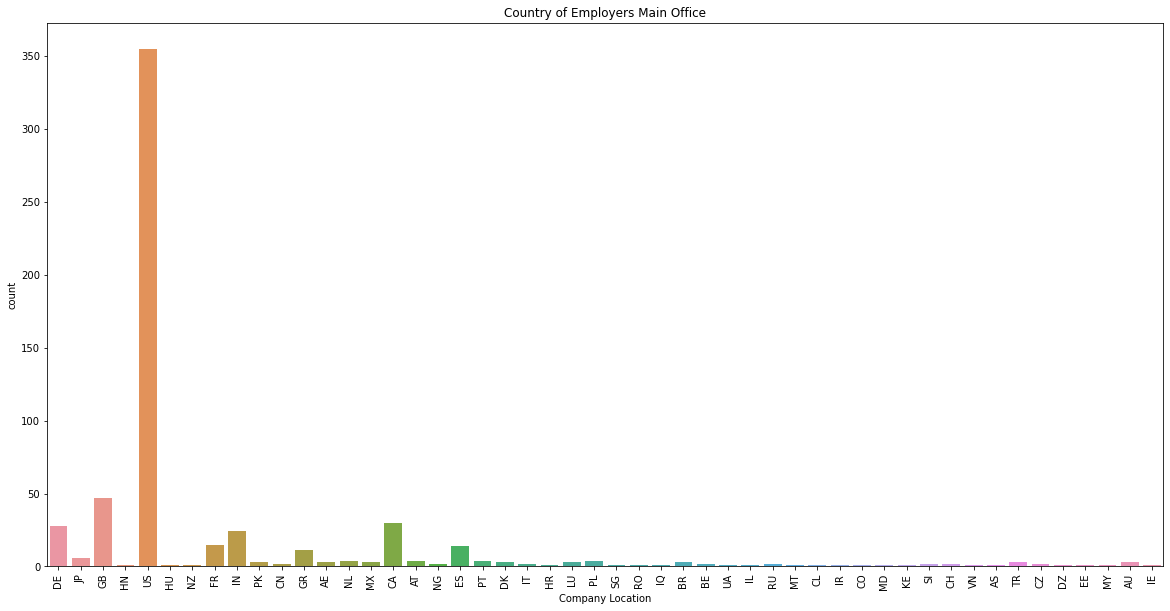

In [26]:
plt.figure(figsize=(20,10))
plt.title('Country of Employers Main Office')
sns.countplot(data=df,x='company_location')
plt.xticks(rotation=90)
plt.xlabel('Company Location')
plt.show()

* The top 3 company location are United States, Great Britain and Canada.

#### Company Size

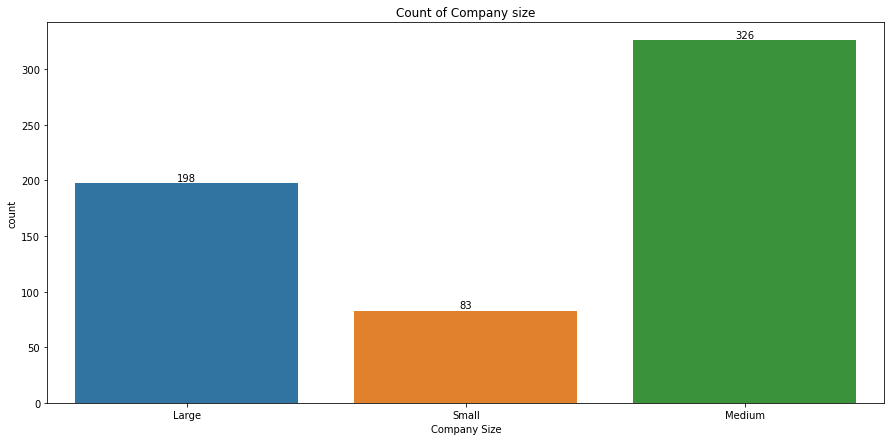

In [27]:
plt.figure(figsize=(15,7))
plt.title('Count of Company size')
ax=sns.countplot(data=df,x='company_size')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Company Size')
plt.show()

* There are more medium-sized companies.

### Work Year Analysis

#### Work Year by Remote Ratio

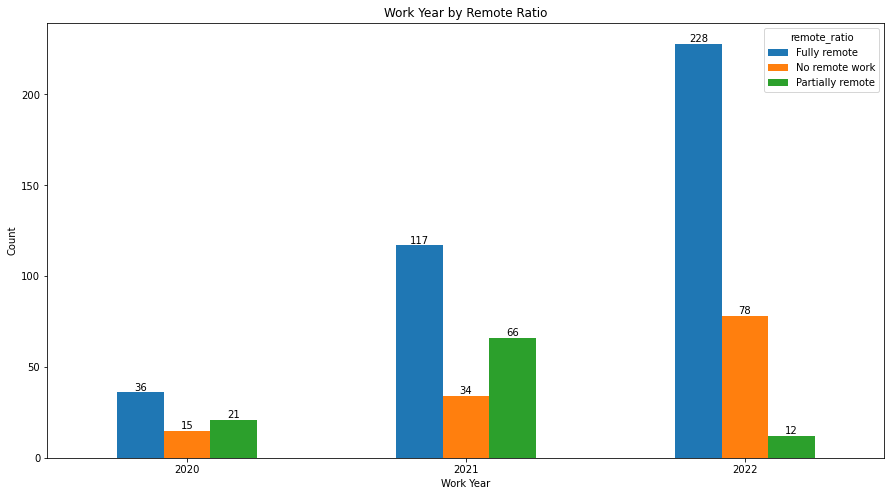

In [28]:
ff=pd.crosstab(df.work_year,df.remote_ratio)

ax = ff.plot.bar(stacked=False,figsize=(15,8))
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Work Year by Remote Ratio')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* There is a huge increase in the count of fully remote jobs across the years. This indicates that data professionals prefer to work fully remote.
* There is also a slight increase in the number of 'No remote' jobs across the years.


### Experience Level Analysis

#### Employment Type by Experience Level

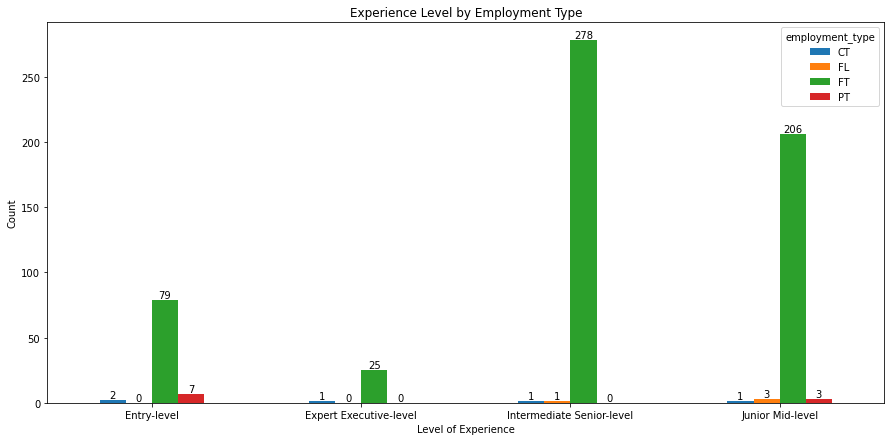

In [29]:
gg=pd.crosstab(df.experience_level,df.employment_type)
ax=gg.plot.bar(stacked=False,figsize=(15,7))
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Experience Level by Employment Type')
plt.xlabel('Level of Experience')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* Data Professionals who work full time(FT) tend to be higher than those of other employment types across all levels of experience.

#### Top 3 Job Title by Experience Level

In [30]:
p=pd.crosstab(df.job_title,df.experience_level).sort_values(by='job_title',ascending=False)
p.iloc[[27,32,37],:]

experience_level,Entry-level,Expert Executive-level,Intermediate Senior-level,Junior Mid-level
job_title,,,,
Data Scientist,22,0,61,60
Data Engineer,12,4,63,53
Data Analyst,12,2,54,29


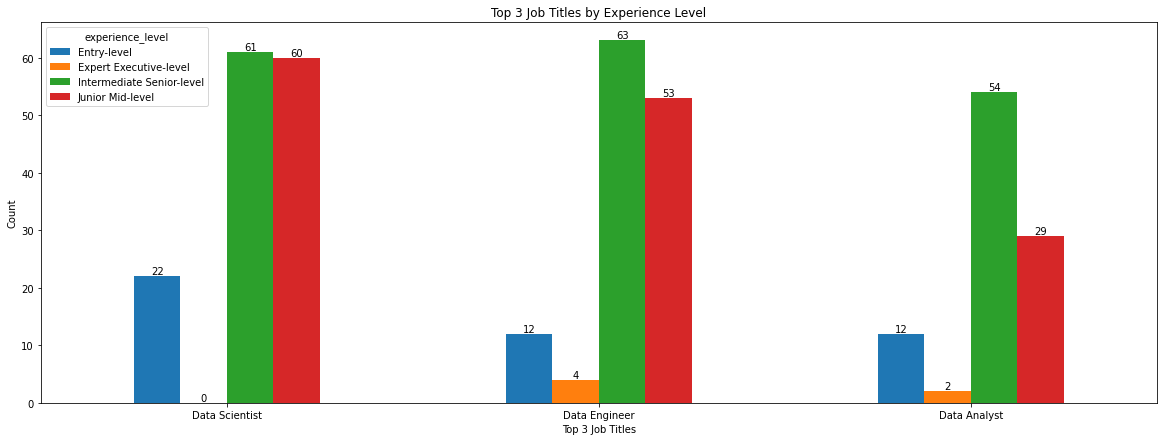

In [31]:
v=p.iloc[[27,32,37],:]
ax=v.plot.bar(stacked=False,figsize=(20,7))
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 3 Job Titles by Experience Level')
plt.xlabel('Top 3 Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* The top 3 job titles are Data Scientist, Data Engineer and Data Analyst.
* Junior mid level(MI) and Intermediate Senior Level(SE) generated the highest count across the job titles.
* The number of experts Executive-level(EX) is extremely low across the top 3 job titles.

#### Company Size by Experience Level

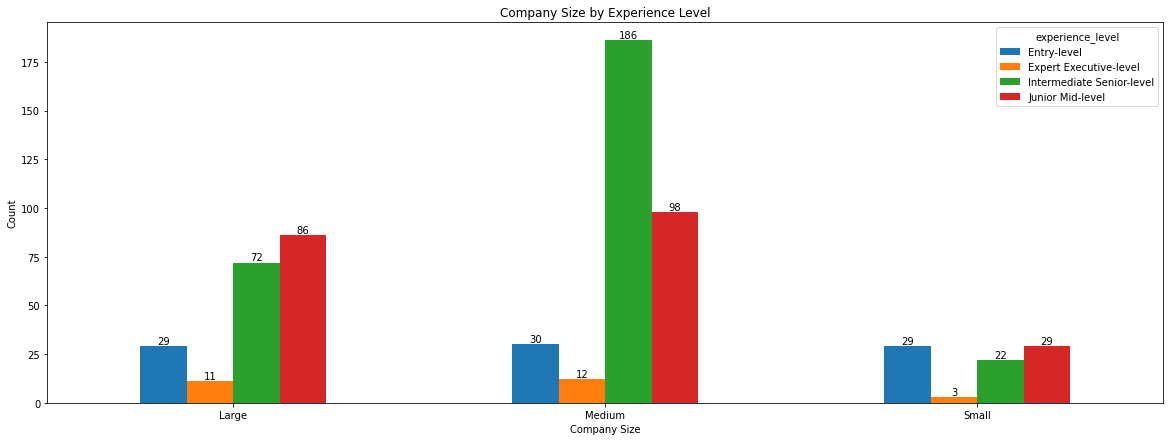

In [32]:
tt=pd.crosstab(df.company_size,df.experience_level)
ax=tt.plot.bar(stacked=False,figsize=(20,7))
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Company Size by Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* Medium-sized companies have the highest number of data scientists across all experience levels.
* Majority of the data professionals in Medium sized companies are Senior-level, followed by Junior Mid level .
* The number of Entry-level(EN) Employees remains the same across the company size.


### Company Location Analysis

#### Company Location by Experience Level

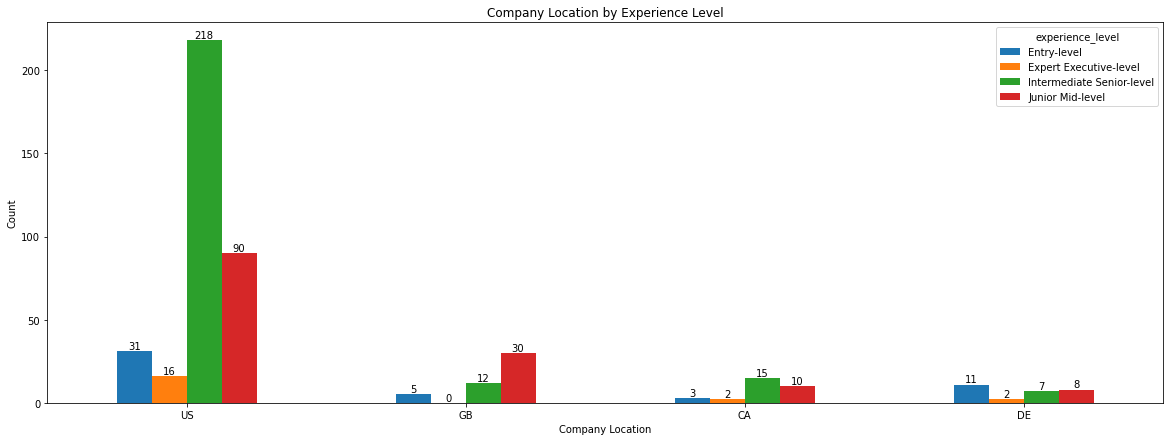

In [33]:
cc=pd.crosstab(df.company_location,df.experience_level).sort_values(by='company_location',ascending=False)
cc.iloc[[1,31,43,37],:]
rr=cc.iloc[[1,31,43,37],:]
ax= rr.plot.bar(stacked=False,figsize=(20,7))
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Company Location by Experience Level')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

* Companies located in the United States(US) tend to be higher than those in other countries. 
* Data Professionals with Intermediate SE senior-level have the highest count in US and in other countries.

### Salary Analysis

#### Salary by Work Year

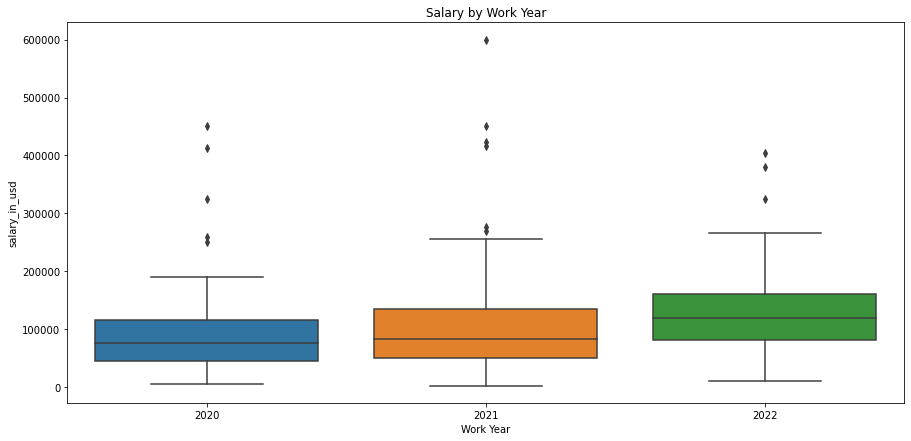

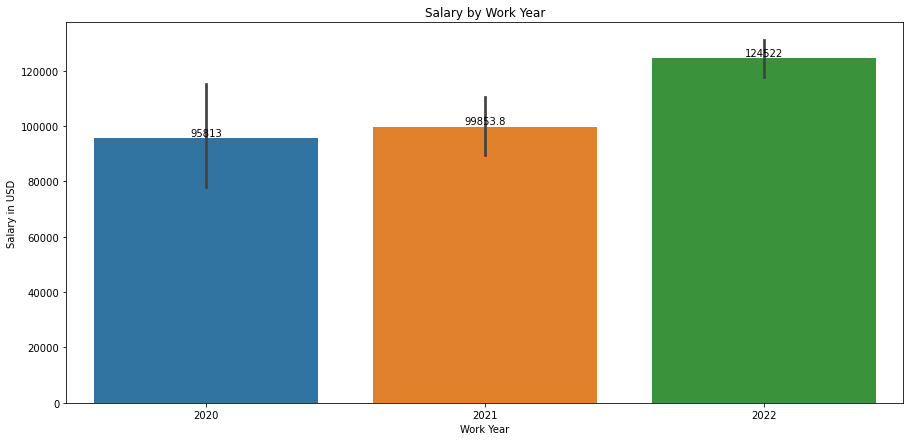

In [36]:
plt.figure(figsize=(15,7))
plt.title('Salary by Work Year')
sns.boxplot(data=df,x='work_year',y='salary_in_usd')
plt.xlabel('Work Year')
plt.show()



plt.figure(figsize=(15,7))
plt.title('Salary by Work Year')
ax=sns.barplot(data=df,x='work_year',y='salary_in_usd')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()





* There is a slight increase in the average salary from 2020(95,813) to 2021(99,854). However, the mean salary increased by approximately 25% from 2021 to 2022.
* In 2020 and 2021, half of the data professionals earn less than 100,000.
* In 2021, there are more scattered data with outliers of 600,000.
* In 2022, 75% of data professionals earn less than 180,000

#### Salary by Experience

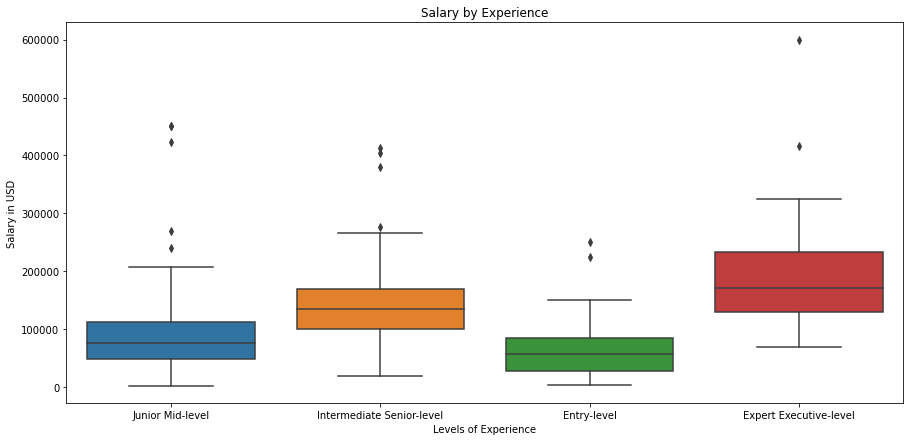

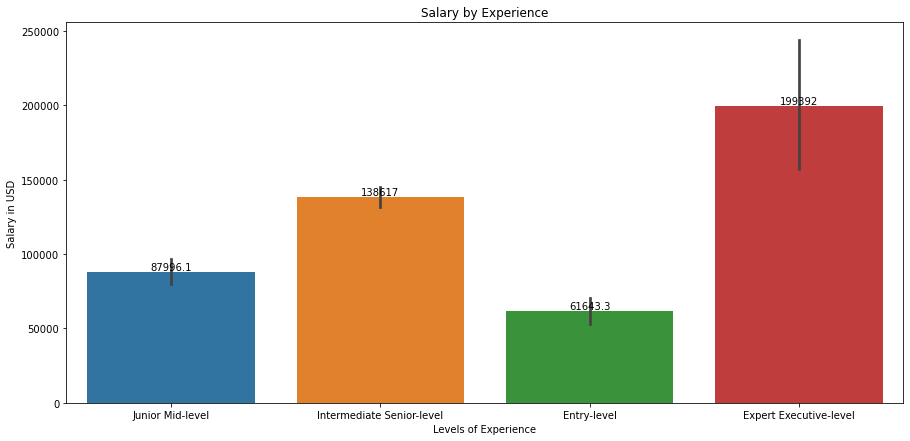

In [38]:
plt.figure(figsize=(15,7))
plt.title('Salary by Experience')
sns.boxplot(data=df,x='experience_level',y='salary_in_usd')
plt.xlabel('Levels of Experience')
plt.ylabel('Salary in USD')
plt.show()


plt.figure(figsize=(15,7))
plt.title('Salary by Experience')
ax=sns.barplot(data=df,x='experience_level',y='salary_in_usd')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Levels of Experience')
plt.ylabel('Salary in USD')
plt.show()

* The average salary increases with the level of experience.
* `Entry level(EN):`The average salary is a little above 60,000. 75% of data scientists earn less than 100,000.
* `Junior Mid-level(MI):` The mean salary is around 88,000.While 50% of data scientists earn less than 100,000.
* `Intermediate Senior Level(SE):` The mean salary is close to 140,000. 75% of data scientists earn less than 200,000.
* `Expert Executive Level(EX):` The average salary is around 200,000. We can see that the outlier of 600,000 is earned by an expert in the Executive level and this is expected as a data professional increases in levels of experience, the salary also increases.

#### Salary by Company Size

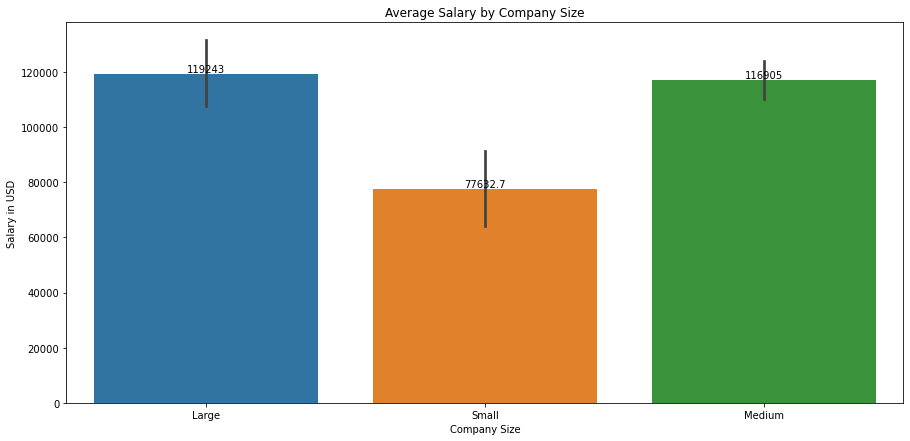

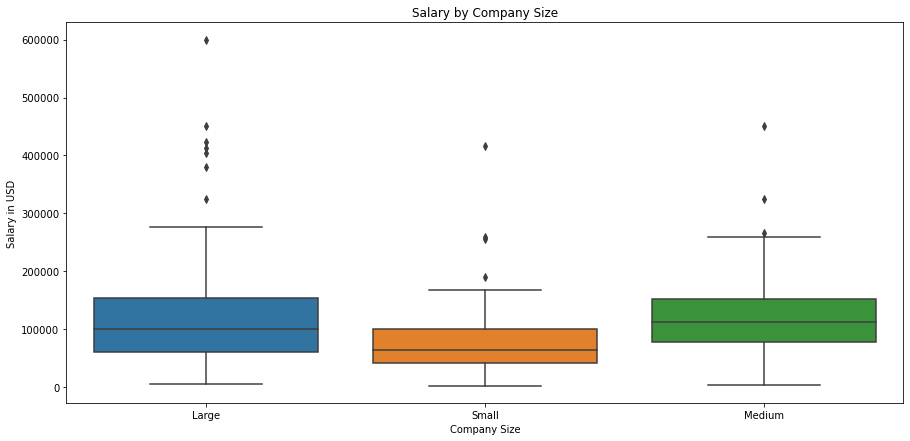

In [41]:
plt.figure(figsize=(15,7))
plt.title('Average Salary by Company Size')
ax=sns.barplot(data=df,x='company_size',y='salary_in_usd')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()


plt.figure(figsize=(15,7))
plt.title('Salary by Company Size')
sns.boxplot(data=df,x='company_size',y='salary_in_usd')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

* The average salary in a large company is higher than that of a medium-sized company.
* We can also see that the highest outlier of 600,000 is paid by a large company, which is expected.

#### Highest Salaries by Job Title

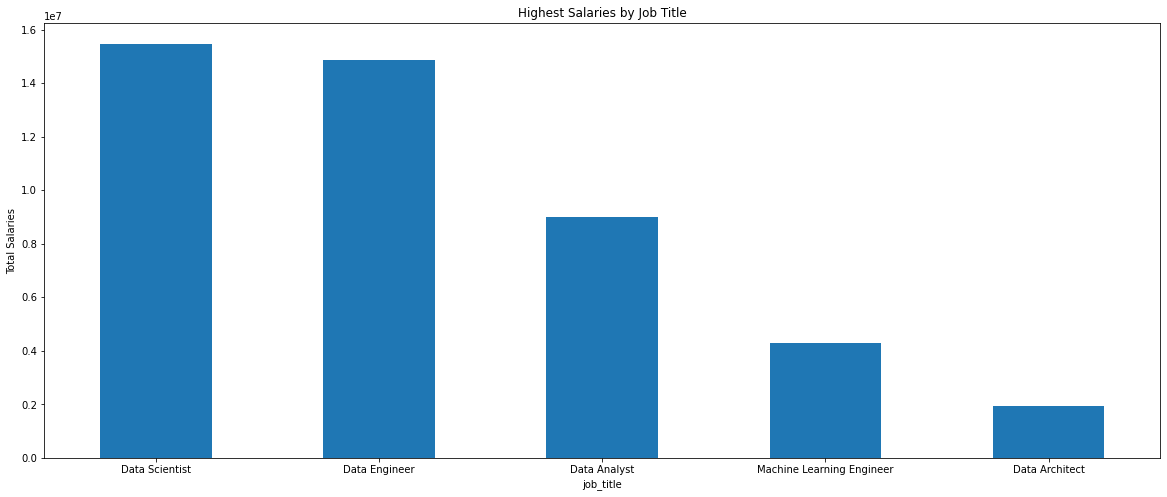

In [45]:
u=df.groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False).head()
plt.figure(figsize=(20,8))
plt.title('Highest Salaries by Job Title')
plt.xlabel('Job Titles')
plt.ylabel('Total Salaries')
u.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

* Data Scientist has the highest salaries, followed by Data Engineer.

#### Average Salary by Company Location

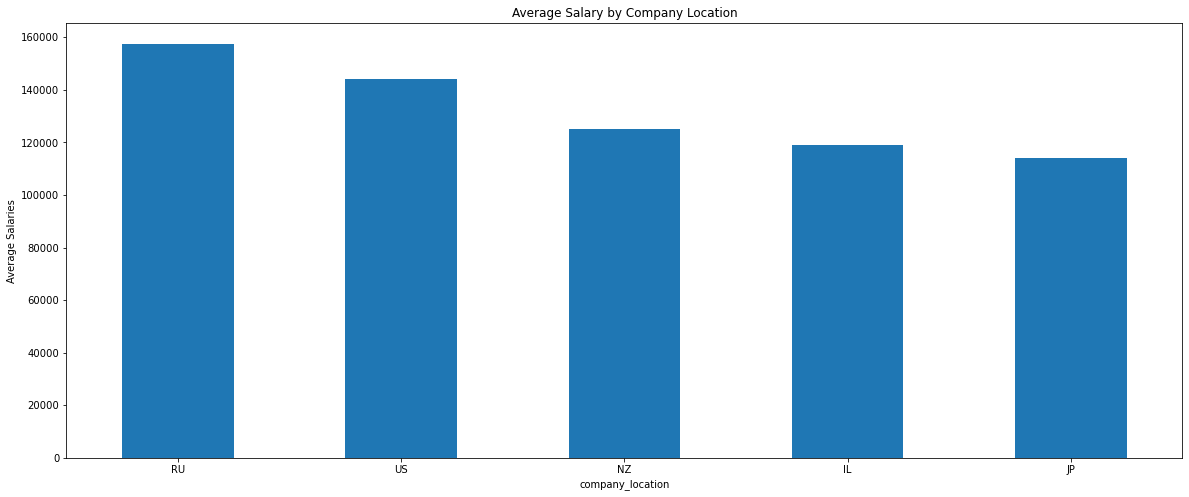

In [46]:
z=df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head()
plt.figure(figsize=(20,8))
plt.title('Average Salary by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salaries')
z.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

*  The top 5 average salaries by company location are Russia,United States,New Zealand,Israel and Japan.

#### Recommendation
I would recommend that information be given about the industries the data professionals work in. For example, Technology, Health, Government, Banking and Finance, Education etc. 